In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
%cd gdrive/MyDrive/Datasets/Parkinson

/content/gdrive/MyDrive/Datasets/Parkinson


# Get dataset informations

In [3]:
import pandas as pd
data = pd.read_csv('Pd.csv')
print("Total of Pd ", len(data.index))
print("Mean age",round(data['Age'].mean(),1))
print("Max age",data.max(axis=0)['Age'])
print("Min age",data.min(axis=0)['Age'])


print("Nbr of Female", len(data[(data['Sex'] == 'F')]))
print("Nbr of Male", len(data[(data['Sex'] == 'M')]))

Total of Pd  425
Mean age 63.8
Max age 87
Min age 34
Nbr of Female 164
Nbr of Male 261


In [4]:
import pandas as pd
data = pd.read_csv('Control_PD.csv')
print("Total of Control ", len(data.index))
print("Mean age",round(data['Age'].mean(),1))
print("Max age",data.max(axis=0)['Age'])
print("Min age",data.min(axis=0)['Age'])
print("Nbr of Female", len(data[(data['Sex'] == 'F')]))
print("Nbr of Male", len(data[(data['Sex'] == 'M')]))

Total of Control  209
Mean age 60.7
Max age 84
Min age 31
Nbr of Female 74
Nbr of Male 135


# Convert .dcm to .png

In [5]:
!pip install pydicom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.0 MB 7.6 MB/s 


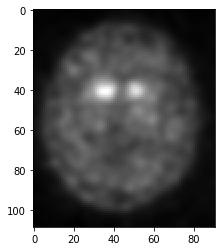

In [7]:
import pydicom as dicom
import matplotlib.pyplot as plt
path = "Yes/PPMI_3001_NM_Reconstructed_DaTSCAN_Br_20140410130149873_1_S215843_I419651.dcm"

x=dicom.dcmread(path)
plt.imshow(x.pixel_array[40],cmap=plt.cm.gray)
plt.show()


In [8]:
from PIL import Image
from PIL.ExifTags import TAGS
imagename = "3001.png"

# read the image data using PIL
image = Image.open(imagename)
info_dict = {
    "Filename": image.filename,
    "Image Size": image.size,
    "Image Height": image.height,
    "Image Width": image.width,
    "Image Format": image.format,
    "Image Mode": image.mode,
    "Image is Animated": getattr(image, "is_animated", False),
    "Frames in Image": getattr(image, "n_frames", 1)
}


In [ ]:
for label,value in info_dict.items():
    print(f"{label:25}: {value}")

Filename                 : 3001.png
Image Size               : (91, 109)
Image Height             : 109
Image Width              : 91
Image Format             : PNG
Image Mode               : L
Image is Animated        : False
Frames in Image          : 1


In [19]:
import os
import pydicom as dicom
import numpy as np
import cv2
def dcm_to_png(path,dist):
  p = []
  for filename in os.listdir(path):
      if filename.endswith(".dcm"): 
          # print(os.path.join(directory, filename))
          x = dicom.dcmread(path+"/"+filename)
          img = np.array(x.pixel_array[40], dtype = float) 
          img = (img - img.min()) / (img.max() - img.min()) * 255.0  
          img = img.astype(np.uint8)
          cv2.imwrite(dist + x.PatientID+"-slice041.png",img)
          
          
 

In [21]:

dcm_to_png("Yes","input/Yes/")

In [13]:
import os
print(len(os.listdir("input/Yes/")))

425


In [22]:
dcm_to_png("No","input/No/")

# Split Dataset

In [16]:
!pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [23]:
import splitfolders
splitfolders.ratio("input", output="output",
    seed=1337, ratio=(.8, .1, .1), group_prefix=None, move=False) 

Copying files: 634 files [00:06, 100.53 files/s]


In [25]:
import os

print("train-Yes ",len(os.listdir("output/train/Yes")))
print("train-No ",len(os.listdir("output/train/No")))
print("test-Yes ",len(os.listdir("output/test/Yes")))
print("test-No ",len(os.listdir("output/test/No")))
print("val-Yes ",len(os.listdir("output/val/Yes")))
print("val-No ",len(os.listdir("output/val/No")))

train-Yes  340
train-No  167
test-Yes  43
test-No  22
val-Yes  42
val-No  20
